In [2]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
from sklearn.cluster import KMeans #para clasificar los datos

## Leemos el dataset y lo guardamos en la variable X

In [28]:
X = pnd.read_csv("dataPolitica.csv")
X

,Shares,Me gusta,MeEncanta,MeDivierte,Me asombra,Me entristece,Me enoja,PRI,PAN,MORENA,INDEPENDIENTE,POSITIVO,NEGATIVO,NEUTRAL
0,7764,155,62,1110,0,0,0,1,0,1,1,1,0,0
1,12388,2600,146,4900,18,8,1,1,0,0,0,0,1,0
2,93,25,2,87,0,0,0,0,1,1,0,0,1,0
3,53,43,1,67,0,0,1,1,1,1,0,0,1,0
4,110,31,5,72,0,0,0,1,0,1,0,0,1,0
5,91,37,16,156,3,1,0,0,0,1,0,1,0,0
6,34,24,0,41,1,0,0,0,0,1,0,1,0,0
7,82,27,0,47,0,1,4,1,0,0,0,0,1,0
8,74,40,25,100,0,0,0,0,0,1,0,1,0,0
9,10,17,1,16,0,0,1,1,0,0,0,0,0,1


## Con el método de elbow calculamos los clusters óptimos para clasificar, en base al dataset

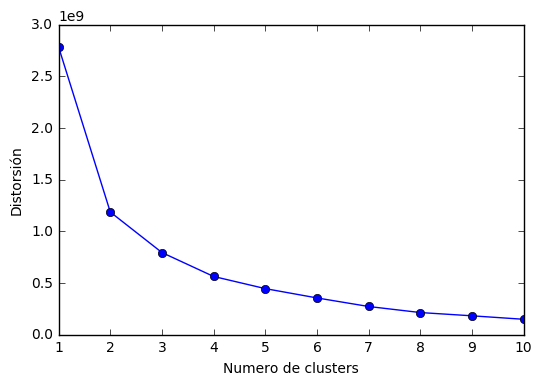

In [29]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

## Vemos que comienza a ser igual a partir del cluster 4, por lo tanto, los clusters óptimos son 3

# Aplicando KMeans en base a los clusters óptimos

In [44]:
clusters = KMeans(n_clusters=3,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

print(np.unique(clusters.fit_predict(X)))

[0 1 2]


## En seguida guardamos los valores en la variable df y aplicamos el algoritmo para clasificar los valores

In [45]:
df = X.values
y_km = clusters.fit_predict(df)
y_km

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2,
       2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0])

## Una vez clasificados, creamos la gráfica, en base a los clusters y los valores clasificados obtenidos

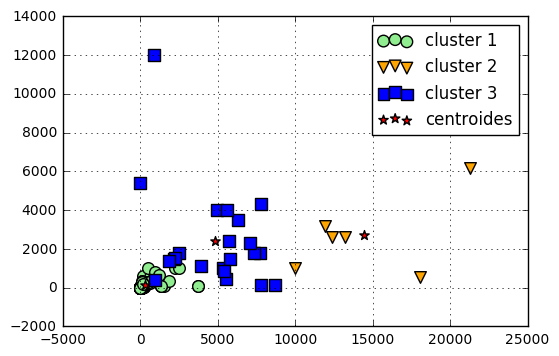

In [47]:
plt.scatter(df[y_km==0,0],
          df[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(df[y_km==1,0],
          df[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(df[y_km==2,0],
          df[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
'''plt.scatter(df[y_km==3,0],
          df[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='o',
          label='cluster 4')'''
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

## En la gráfica podemos gráficamente la representación de los 3 clusters con sus centroides